In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [81]:
df = pd.read_csv("C:\\Users\\HP\\Data-Science\\week_6\\data\\FuelConsumption.csv")

In [82]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [83]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


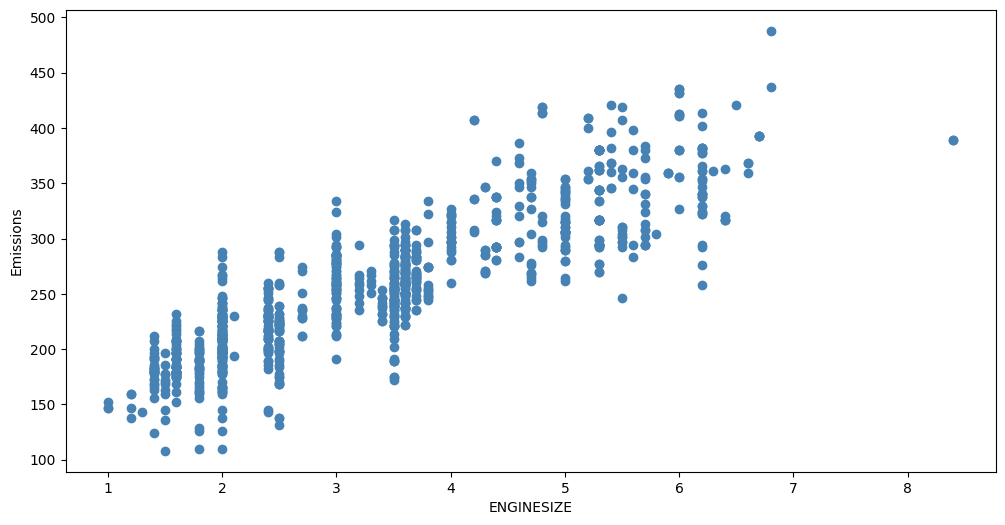

In [84]:
# non-linear regression yapılabilir Bir eğiklik olduğu için
# Başka yöntemlerle yine regression da yapıllabilir ki geçen sefer lineer regression yapmıştık
plt.rcParams['figure.figsize']=(12,6)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [85]:
X_train, X_test, y_train, y_test=train_test_split(cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']],cdf['CO2EMISSIONS'], test_size=0.2)

- In polynomial regression, the  relationshio between the independent variable x and the dependent variable y is modeled a nth degree polynomial in x.
2nd degree:
y = B0 + B1*X + B2*X^2

For  example, the original feature set has only one feature

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [87]:
X_train = np.asanyarray(X_train[['ENGINESIZE']])
y_train = np.asanyarray(y_train)
X_test = np.asanyarray(X_test[['ENGINESIZE']])
y_test = np.asanyarray(y_test)

In [88]:
poly = PolynomialFeatures(degree=2)

In [89]:
train_x_poly = poly.fit_transform(X_train)

In [90]:
train_x_poly

array([[ 1.  ,  5.  , 25.  ],
       [ 1.  ,  5.3 , 28.09],
       [ 1.  ,  1.8 ,  3.24],
       ...,
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.  ,  9.  ]])

- Transformed data looks like feature sets of multiple lineaar regression analysis
2nd degree quation would turn into
y = b0 + b1 *x1 + b2 * x2 

- Formülü buna dönüştürdükten sonra lineer regresyon kullanalar non-linear regresyonu hesaplayabiliriz.

In [91]:
from sklearn import linear_model
clf = linear_model.LinearRegression()


In [92]:
model = clf.fit(train_x_poly,y_train)

In [93]:
print("Coefficents:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficents: [ 0.         52.11939812 -1.77405769]
Intercept: 104.94172912609332


In [94]:
clf.coef_[0]

0.0

In [99]:
test_x_poly = poly.fit_transform(X_test)
pred = clf.predict(test_x_poly)


In [119]:
print(f'MAE = %.2f' % np.mean(abs(y_test - pred)))
print(f'MSE = %.2f' % np.mean(np.square(y_test - pred)))
print(f'RMSE = %.2f' % np.sqrt(np.mean((y_test - pred) ** 2)))
print(f"Training score: %.2f" % r2_score(y_test, pred))

MAE = 23.21
MSE = 924.46
RMSE = 30.41
Training score: 0.78


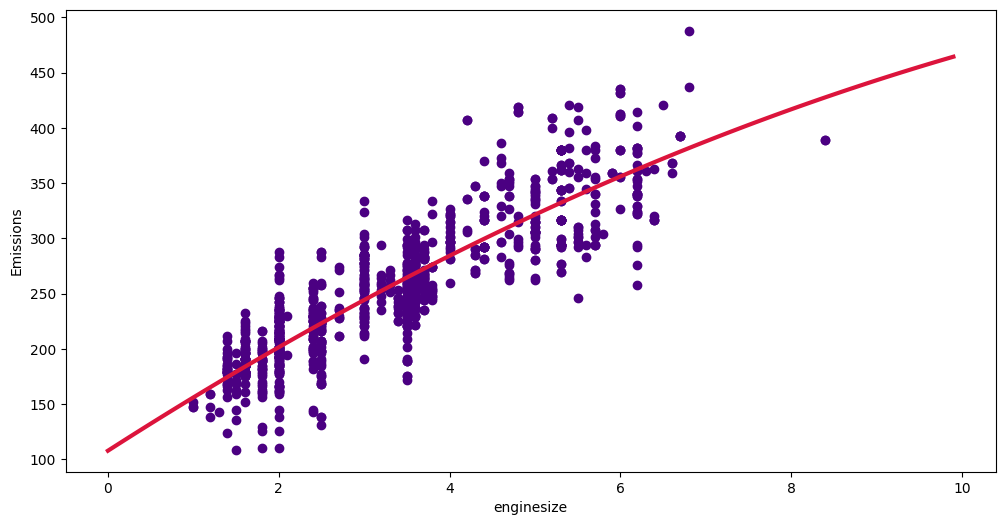

In [ ]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color = 'indigo')
# Ne kadar çok data point koyarsak o kadar curve olur. Bunu ayarlayabilirz
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_ + clf.coef_[1]*XX + clf.coef_[2]*np.power(XX,2)
plt.plot(XX, yy, "crimson", linewidth =3)
plt.xlabel("enginesize")
plt.ylabel("Emissions")
plt.show()

In [100]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[107.73771374 112.68344907 117.60178853 122.49273211 127.35627982
 132.19243165 137.00118761 141.78254769 146.5365119  151.26308023
 155.96225269 160.63402927 165.27840998 169.89539482 174.48498378
 179.04717686 183.58197407 188.0893754  192.56938086 197.02199045
 201.44720416 205.84502199 210.21544395 214.55847004 218.87410025
 223.16233458 227.42317305 231.65661563 235.86266234 240.04131318
 244.19256814 248.31642723 252.41289044 256.48195778 260.52362924
 264.53790483 268.52478454 272.48426838 276.41635634 280.32104843
 284.19834464 288.04824498 291.87074944 295.66585803 299.43357074